In [125]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
from datetime import datetime, timedelta
from fbprophet import Prophet

In [135]:
# We want to simulate yesterday's stock market data
d = datetime.today() - timedelta(days=1)
day_to_simulate = d.strftime('%Y-%m-%d')
day_to_simulate

'2020-05-12'

In [136]:
api_key = 'B0N8Q38MJAVBSLOY'

In [137]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT', interval = '1min', outputsize = 'full')

In [138]:
data = data.reset_index()

In [139]:
data_prophet = data[["date","1. open"]]
data_prophet.columns = ["ds", "y"]

In [140]:
# Use to reverse dataframe
data_prophet = data_prophet.iloc[::-1]
data_prophet = data_prophet.reset_index()
data_prophet = data_prophet.drop(['index'], axis = 1)

In [141]:
data_prophet['string_ds'] = data_prophet['ds'].astype(str)

In [142]:
data_prophet

,ds,y,string_ds
0,2020-05-07 09:31:00,184.210,2020-05-07 09:31:00
1,2020-05-07 09:34:00,184.435,2020-05-07 09:34:00
2,2020-05-07 09:35:00,184.520,2020-05-07 09:35:00
3,2020-05-07 09:36:00,183.980,2020-05-07 09:36:00
4,2020-05-07 09:37:00,183.520,2020-05-07 09:37:00
...,...,...,...
1550,2020-05-12 15:56:00,182.400,2020-05-12 15:56:00
1551,2020-05-12 15:57:00,182.940,2020-05-12 15:57:00
1552,2020-05-12 15:58:00,182.890,2020-05-12 15:58:00
1553,2020-05-12 15:59:00,182.775,2020-05-12 15:59:00


In [143]:
# Only consider one day of data
data_prophet = data_prophet[data_prophet.string_ds.str.startswith((day_to_simulate))]

In [144]:
data_prophet = data_prophet.drop(['string_ds'], axis = 1)

In [146]:
data_prophet

,ds,y
1166,2020-05-12 09:31:00,186.590
1167,2020-05-12 09:32:00,186.770
1168,2020-05-12 09:33:00,186.915
1169,2020-05-12 09:34:00,186.940
1170,2020-05-12 09:35:00,186.450
...,...,...
1550,2020-05-12 15:56:00,182.400
1551,2020-05-12 15:57:00,182.940
1552,2020-05-12 15:58:00,182.890
1553,2020-05-12 15:59:00,182.775


In [147]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=1, freq = 'min', include_history = False)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/user/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [151]:
# predict price the next minute
forecast = m.predict(future)
float(forecast['trend'])

183.278527411945

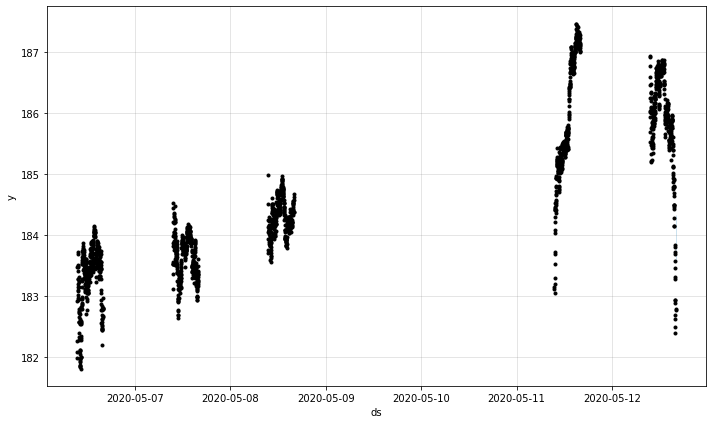

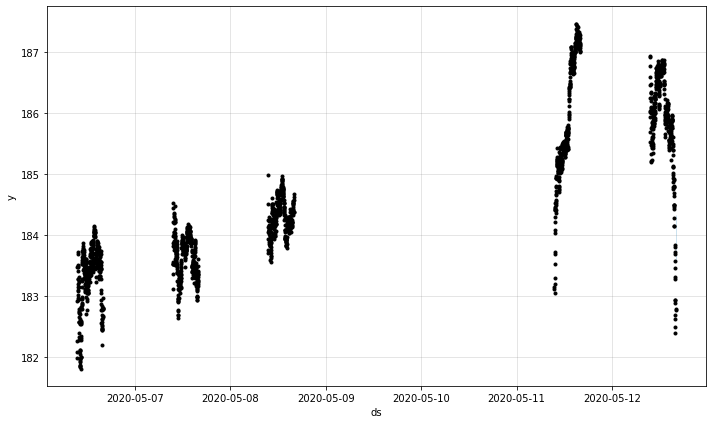

In [64]:
fig1 = m.plot(forecast)
fig1